# Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('W4 - D1 - we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.columns = map(str.lower,data.columns)
data.columns = data.columns.str.replace(' ','_')
data = data.rename(columns = {'employmentstatus': 'employment_status'})
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. Get the numerical variables from our dataset.

In [5]:
num = data.select_dtypes(include='number')
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

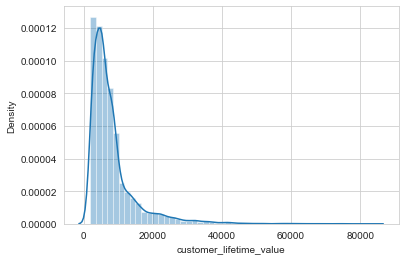

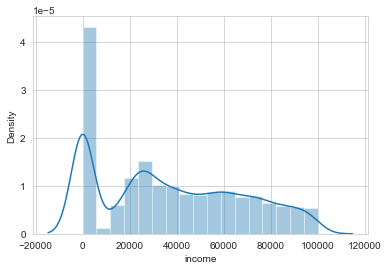

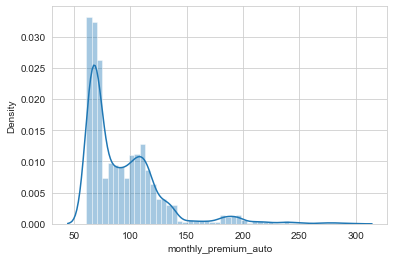

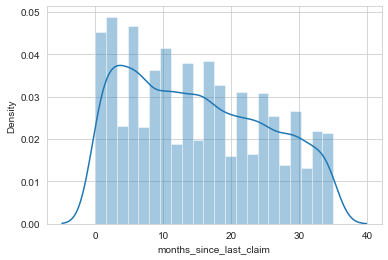

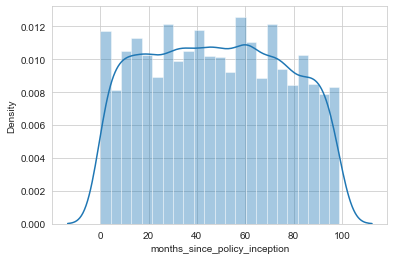

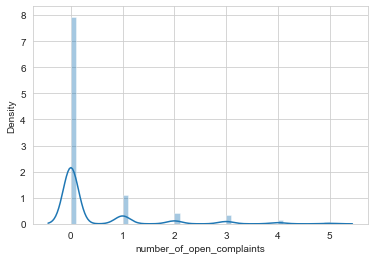

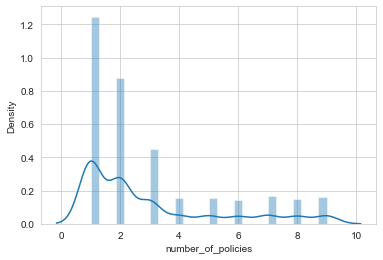

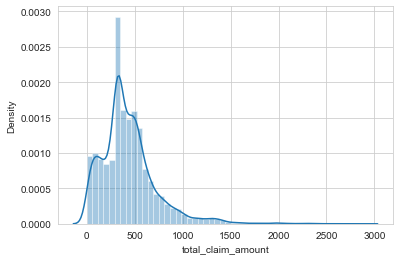

In [6]:
for i in num.columns:
    sns.distplot(num[i])
    plt.show()

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### LOG Transform

In [7]:
def log_transform(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [8]:
num_log = num.applymap(log_transform)
num_log.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,NaN,0.000000,5.952753
1,8.850738,NaN,4.543295,2.564949,3.737670,NaN,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,NaN,0.693147,6.339428
3,8.941920,NaN,4.663439,2.890372,4.174387,NaN,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,NaN,0.000000,4.928202


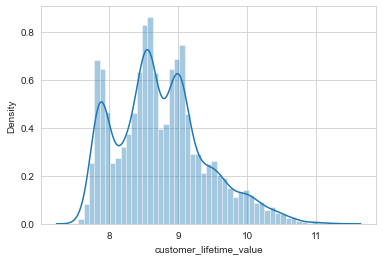

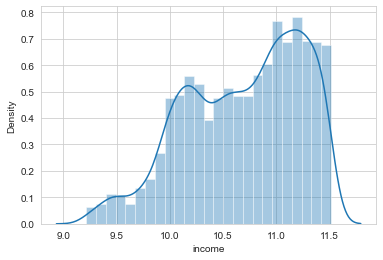

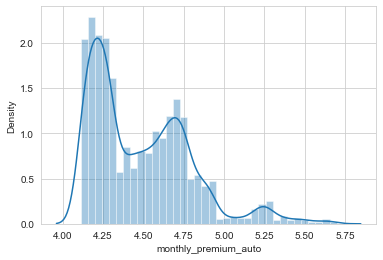

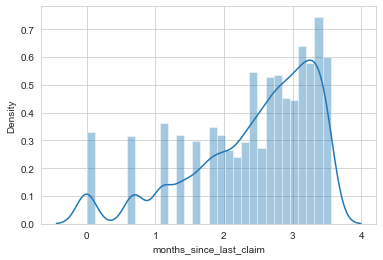

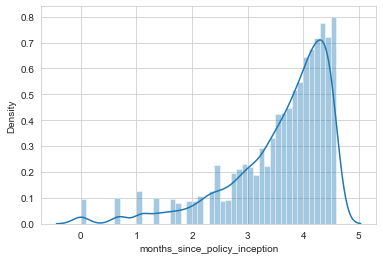

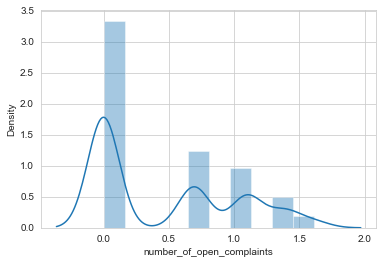

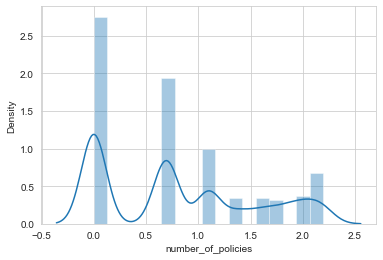

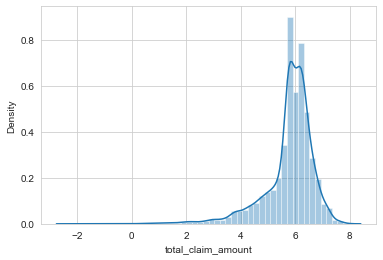

In [9]:
for i in num_log.columns:
    sns.distplot(num_log[i])
    plt.show()

### SQRT Transform

In [10]:
def sqrt_transform(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [11]:
num_sqrt = num.applymap(sqrt_transform)
num_sqrt.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,52.569186,237.221416,8.306624,5.656854,2.236068,0.0,1.000000,19.616604
1,83.543617,0.000000,9.695360,3.605551,6.480741,0.0,2.828427,33.637255
2,113.522824,220.832516,10.392305,4.242641,6.164414,0.0,1.414214,23.800677
3,87.440619,0.000000,10.295630,4.242641,8.062258,0.0,2.645751,23.019152
4,53.044251,209.370485,8.544004,3.464102,6.633250,0.0,1.000000,11.752909


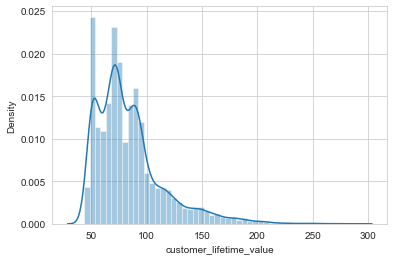

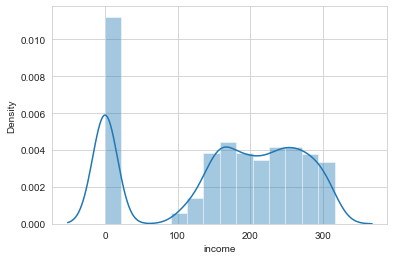

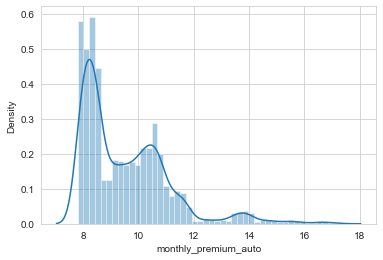

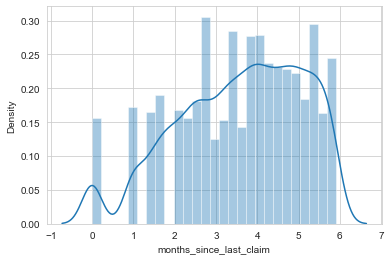

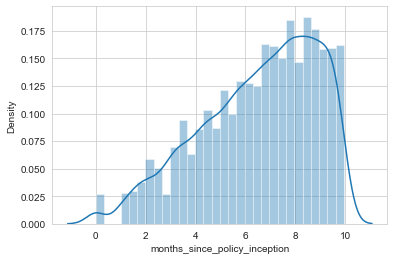

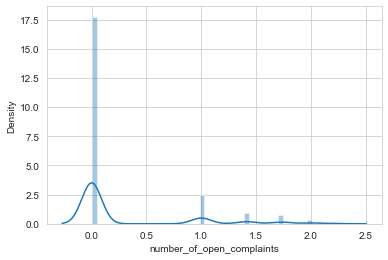

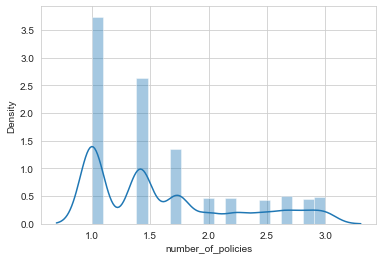

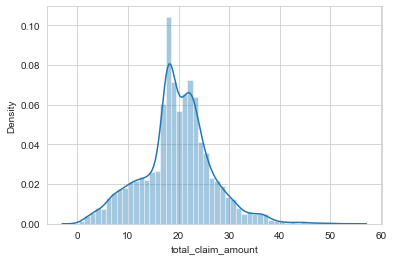

In [12]:
for i in num_sqrt.columns:
    sns.distplot(num_sqrt[i])
    plt.show()

### Normalizer

In [13]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(num)
num_norm = pd.DataFrame(transformer.transform(num), columns=num.columns)
num_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


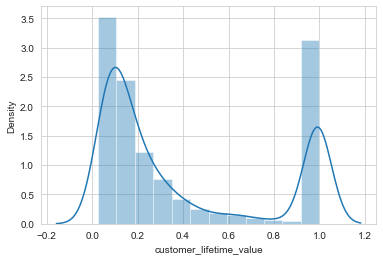

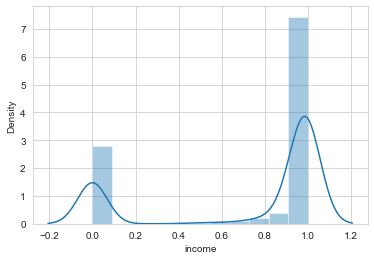

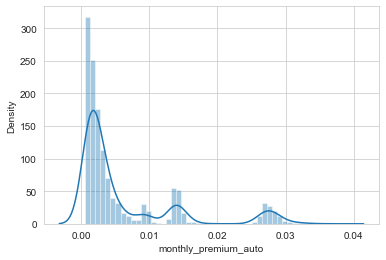

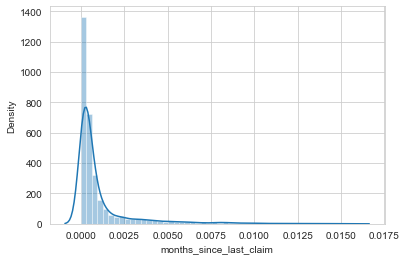

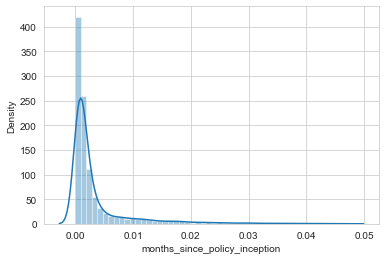

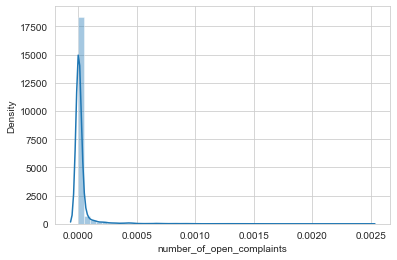

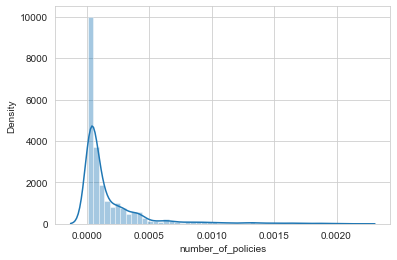

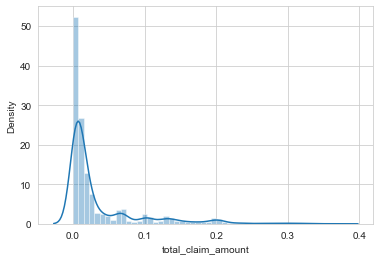

In [14]:
for i in num_norm.columns:
    sns.distplot(num_norm[i])
    plt.show()

### Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(num)
num_stsc = pd.DataFrame(transformer.transform(num), columns=num.columns)
num_stsc.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


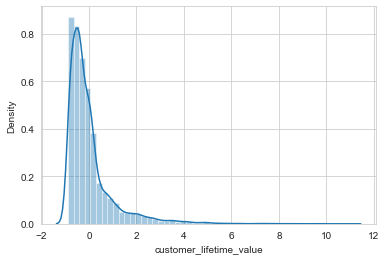

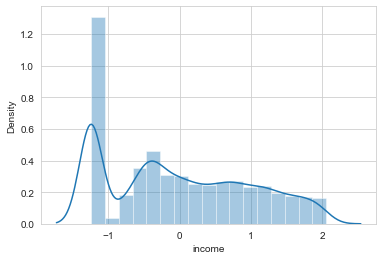

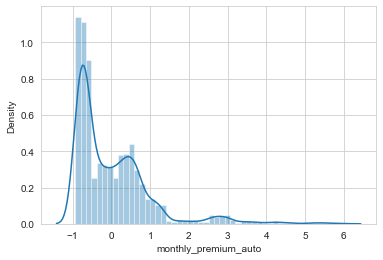

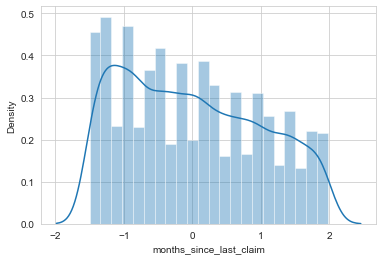

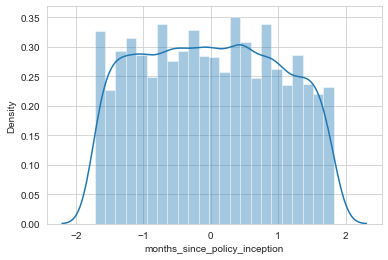

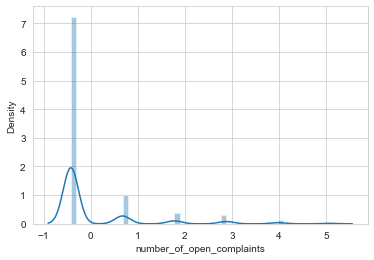

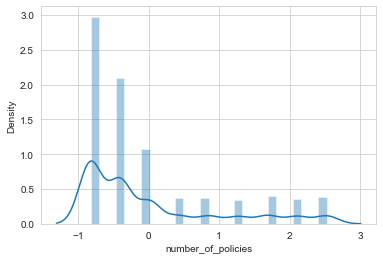

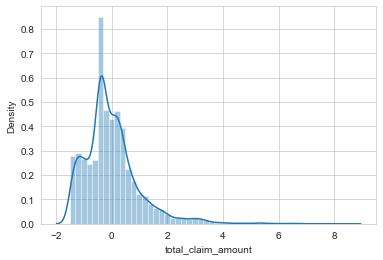

In [16]:
for i in num_stsc.columns:
    sns.distplot(num_stsc[i])
    plt.show()

### MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(num)
num_minmax = pd.DataFrame(scaler.transform(num), columns=num.columns)
num_minmax.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


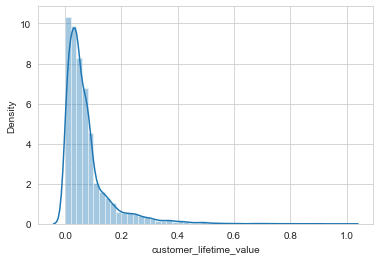

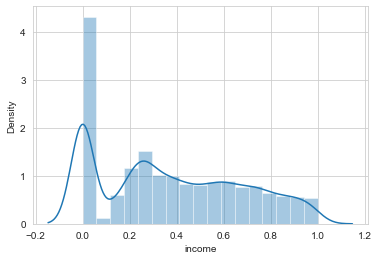

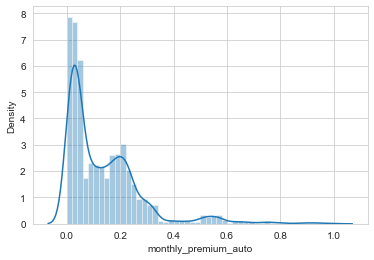

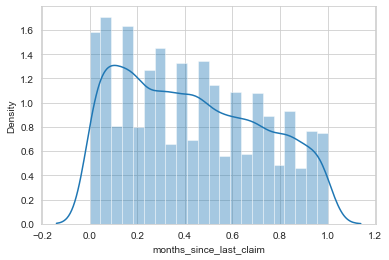

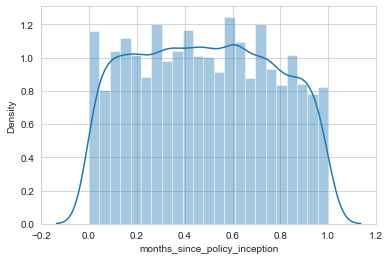

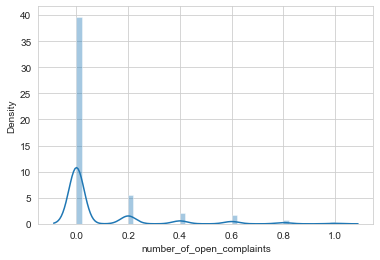

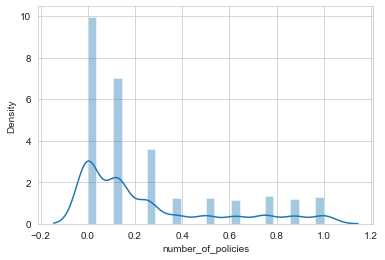

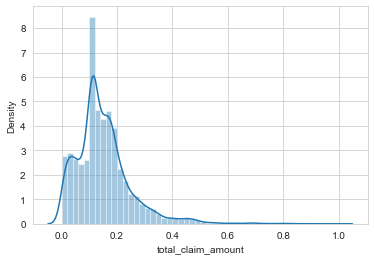

In [18]:
for i in num_minmax.columns:
    sns.distplot(num_minmax[i])
    plt.show()

### BOX-COX

In [20]:
from scipy import stats

In [19]:
#I get error that values must be positive because of the 0's in my df, so I add 1 to all values.
num_positive = num+1
num_positive.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2764.519279,56275,70,33,6,1,2,385.811147
1,6980.535903,1,95,14,43,1,9,1132.464935
2,12888.431650,48768,109,19,39,1,3,567.472247
3,7646.861827,1,107,19,66,1,8,530.881344
4,2814.692575,43837,74,13,45,1,2,139.130879


In [26]:
num_positive.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

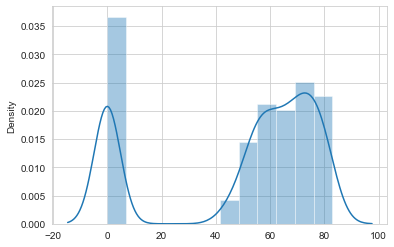

In [25]:
a, b = stats.boxcox(num_positive['income'])
sns.distplot(a, bins=12)
plt.show()

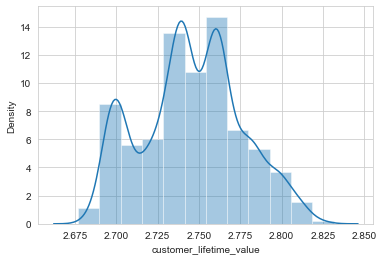

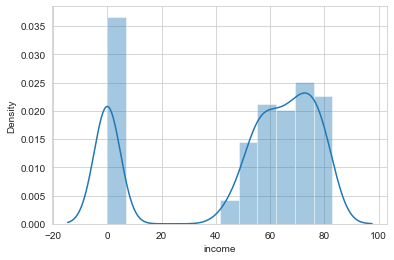

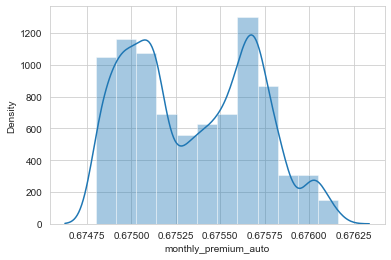

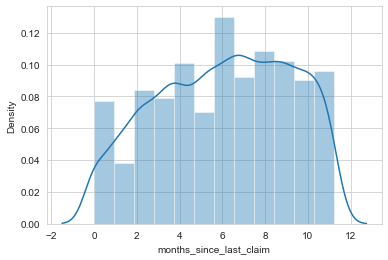

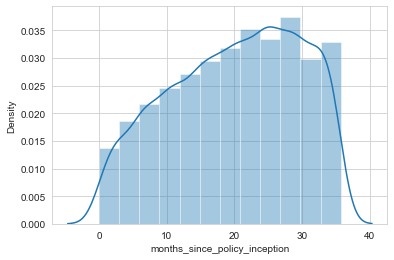

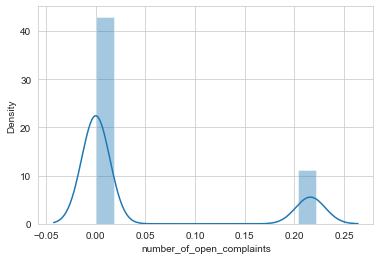

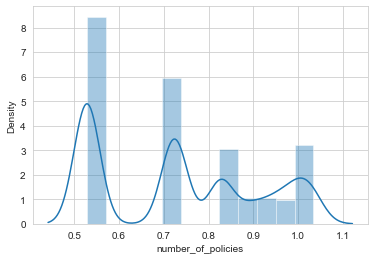

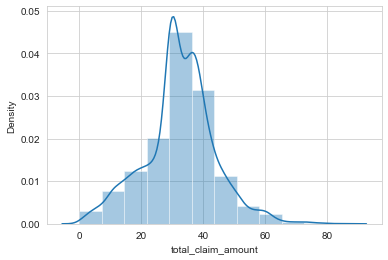

In [30]:
# Creating a for loop to apply boxcox and plot on all columns. Just to be sure that it works, I can compare income plot.
for i in num_positive.columns:
    a, b = stats.boxcox(num_positive[i])
    sns.distplot(a, bins=12).set(xlabel=i)
    plt.show()